In [1]:
!pip install -q tf_nightly

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [5]:
len(train_data)

25000

In [6]:
len(train_labels)

25000

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
len(train_data[0])

218

In [9]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3

reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [12]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                    value=word_index["<PAD>"],
                                    padding='post',
                                    maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                    value=word_index["<PAD>"],
                                    padding='post',
                                    maxlen=256)

In [14]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [15]:
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then <PAD> <PAD> <PAD> <PAD>

In [17]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['acc'])

W0813 17:17:37.574880 23416 deprecation.py:323] From c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [20]:
history = model.fit(partial_x_train,partial_y_train,
                   epochs=40,
                   batch_size=128,
                   validation_data=(x_val, y_val),
                   verbose=1)

W0813 17:19:58.821259 23416 deprecation.py:323] From c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:455: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 98us/sample - loss: 0.6863 - acc: 0.6565 - val_loss: 0.6699 - val_acc: 0.7469
Epoch 2/40
15000/15000 [==============================] - 1s 86us/sample - loss: 0.6169 - acc: 0.7822 - val_loss: 0.5556 - val_acc: 0.8054
Epoch 3/40
15000/15000 [==============================] - 1s 99us/sample - loss: 0.4733 - acc: 0.8401 - val_loss: 0.4245 - val_acc: 0.8460
Epoch 4/40
15000/15000 [==============================] - 1s 91us/sample - loss: 0.3576 - acc: 0.8768 - val_loss: 0.3522 - val_acc: 0.8647
Epoch 5/40
15000/15000 [==============================] - 1s 98us/sample - loss: 0.2912 - acc: 0.8940 - val_loss: 0.3157 - val_acc: 0.8752
Epoch 6/40
15000/15000 [==============================] - 1s 83us/sample - loss: 0.2493 - acc: 0.9080 - val_loss: 0.2970 - val_acc: 0.8815
Epoch 7/40
15000/15000 [==============================] - 1s 86us/sample - loss: 0.2195 - acc: 0.9204 - val_loss: 0.

15000/15000 [==============================] - 2s 102us/sample - loss: 0.0112 - acc: 0.9991 - val_loss: 0.6052 - val_acc: 0.8648
Epoch 36/40
15000/15000 [==============================] - 2s 105us/sample - loss: 0.0101 - acc: 0.9993 - val_loss: 0.6170 - val_acc: 0.8644
Epoch 37/40
15000/15000 [==============================] - 1s 93us/sample - loss: 0.0086 - acc: 0.9994 - val_loss: 0.6369 - val_acc: 0.8643
Epoch 38/40
15000/15000 [==============================] - 1s 86us/sample - loss: 0.0074 - acc: 0.9996 - val_loss: 0.6549 - val_acc: 0.8633
Epoch 39/40
15000/15000 [==============================] - 1s 91us/sample - loss: 0.0064 - acc: 0.9997 - val_loss: 0.6675 - val_acc: 0.8624
Epoch 40/40
15000/15000 [==============================] - 1s 81us/sample - loss: 0.0056 - acc: 0.9998 - val_loss: 0.6834 - val_acc: 0.8630


In [21]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 32us/sample - loss: 0.7288 - acc: 0.8506
[0.7288106567573548, 0.85064]


In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [23]:
history.history

{'loss': [0.6863487977663676,
  0.6169289734840393,
  0.4732929629484812,
  0.35758371742566425,
  0.29117002936999004,
  0.24928439423243204,
  0.21952779664993285,
  0.1954622576077779,
  0.17559686253468196,
  0.15921881726781528,
  0.1426518761952718,
  0.12978863480091096,
  0.11841756904919942,
  0.10748205762704213,
  0.09757782918214798,
  0.08856530742744605,
  0.0808309070388476,
  0.07333024309873581,
  0.066051025446256,
  0.0598609850247701,
  0.05461672298113505,
  0.04946506737073263,
  0.04444559257427851,
  0.04068564370572567,
  0.036282908391952515,
  0.03293625922401746,
  0.02871887045701345,
  0.025408554570873577,
  0.02260919688741366,
  0.0201389227733016,
  0.017840798337757587,
  0.0160030146141847,
  0.014344592779378097,
  0.012636694460610548,
  0.011226591929545005,
  0.010098697972794373,
  0.008567767407248418,
  0.007431416423122088,
  0.006383837503939867,
  0.005629407643154264],
 'acc': [0.65653336,
  0.7822,
  0.8400667,
  0.8768,
  0.894,
  0.908,

In [24]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

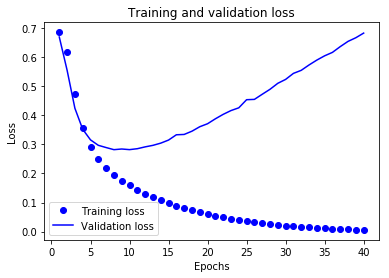

In [25]:
epochs= range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

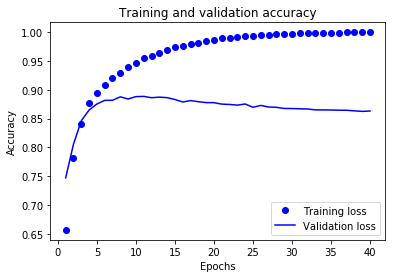

In [26]:
epochs= range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()